To do:
- perguntar sobre o anticontrol no primeiro R
- perguntar sobre o theta til
- perguntar sobre a quantidade de qubits e a quantidade de operacoes R
- o que é Ancilla

Anotações:
- o Uw é só introduzir $(-1)*\phi$ do mesmo jeito que foi introduzido o $\theta$
- normalmente o tamanho de theta é uma potência de 2
- as portas $X$ são colocadas no cicuito de modo a aplicar a operação $R$ somente ao estado desejado (visto que a porta $R$, da maneira que implementamos, só é aplicada quando o estado atual é $|11>$)
- Existe uma porta $P$ que faz o que implementamos como rzao
- Lembrar de fazer o theta til em vez de só theta

In [54]:
from qiskit import *
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
import numpy as np

## $U_i$

In [42]:
def Ui(theta:[float]):

    numQubits = int(np.log2(len(theta)))

    register = QuantumRegister(numQubits)

    circuito = QuantumCircuit(register)

    circuito.h(range(numQubits))

    thetaTil = list(map(lambda x: x-theta[0], theta[1:]))

    for i in range(len(thetaTil)):

        num = bin(i+1)[2:].zfill(numQubits)

        count=0 # essa variavel vai guardar em que posicao na string estamos

        for j in num: # iterando pelos caracteres de num

            if(j=='0'):

                circuito.x(count)

            count+=1

        circuito.mcp(thetaTil[i], list(range(len(num)-1)), len(num)-1)

        count=0 # essa variavel vai guardar em que posicao na string estamos

        for j in num: # iterando pelos caracteres de num

            if(j=='0'):

                circuito.x(count) # desfazendo os nots

            count+=1

    return circuito.to_gate()

In [43]:
thetaEx = [10, 12, 13, 11]

register1 = QuantumRegister(2, name='qr')

circuito = QuantumCircuit(register1)
circuito.append(Ui(thetaEx), [0,1])

circuito.decompose().draw()

┌───┐┌───┐       ┌───┐                   
qr_0: ┤ H ├┤ X ├─■─────┤ X ├─■───────────■─────
      ├───┤└───┘ │P(2) ├───┤ │P(3) ┌───┐ │P(1) 
qr_1: ┤ H ├──────■─────┤ X ├─■─────┤ X ├─■─────
      └───┘            └───┘       └───┘

## $U_w$

In [44]:
def Uw(phi:[float]):

    numQubits = int(np.log2(len(phi)))

    register = QuantumRegister(numQubits)

    circuito = QuantumCircuit(register)    

    phiTil = list(map(lambda x: (x-phi[0])*(-1), phi[1:])) # Phase(lambda)^daga == Phase(-lambda)

    for i in range(len(phiTil)):

        num = bin(i+1)[2:].zfill(numQubits)

        count=0 # essa variavel vai guardar em que posicao na string estamos

        for j in num: # iterando pelos caracteres de num

            if(j=='0'):

                circuito.x(count)

            count+=1

        circuito.mcp(phiTil[i], list(range(len(num)-1)), len(num)-1)

        count=0 # essa variavel vai guardar em que posicao na string estamos

        for j in num: # iterando pelos caracteres de num

            if(j=='0'):

                circuito.x(count) # desfazendo os nots

            count+=1

    circuito.h(range(numQubits))

    circuito.x(range(numQubits))

    return circuito.to_gate()

In [45]:
phiEx = [10, 12, 13, 11]

register1 = QuantumRegister(2, name='qr')

circuito = QuantumCircuit(register1)
circuito.append(Uw(phiEx), [0,1])

circuito.decompose().draw()

┌───┐        ┌───┐                     ┌───┐┌───┐
qr_0: ┤ X ├─■──────┤ X ├─■────────────■──────┤ H ├┤ X ├
      └───┘ │P(-2) ├───┤ │P(-3) ┌───┐ │P(-1) ├───┤├───┤
qr_1: ──────■──────┤ X ├─■──────┤ X ├─■──────┤ H ├┤ X ├
                   └───┘        └───┘        └───┘└───┘

## Teste

In [53]:
register = QuantumRegister(2)

register2 = QuantumRegister(1, name='output')

classicalBit = ClassicalRegister(1)

circuito = QuantumCircuit(register, register2, classicalBit)

thetaEx = [np.pi/6, np.pi/4, np.pi/2, np.pi]
phiEx = [0, np.pi/2, np.pi/4, np.pi/6]

circuito.append(Ui(thetaEx), [0,1])
circuito.barrier()
circuito.append(Uw(phiEx), [0,1])
circuito.barrier()

circuito.mcx([0,1], 2)

circuito.measure(2,0)

circuito.draw()

┌─────────────┐ ░ ┌─────────────┐ ░         
 q26_0: ┤0            ├─░─┤0            ├─░───■─────
        │  circuit-90 │ ░ │  circuit-93 │ ░   │     
 q26_1: ┤1            ├─░─┤1            ├─░───■─────
        └─────────────┘ ░ └─────────────┘ ░ ┌─┴─┐┌─┐
output: ────────────────░─────────────────░─┤ X ├┤M├
                        ░                 ░ └───┘└╥┘
  c3: 1/══════════════════════════════════════════╩═
                                                  0

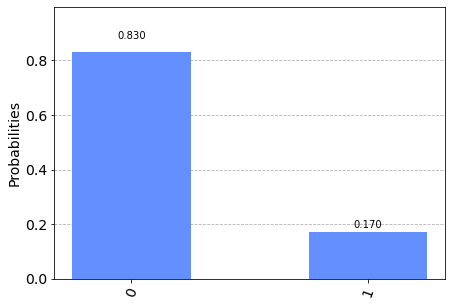

In [57]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

qobj = assemble(circuito.decompose())     # Create a Qobj from the circuit for the simulator to run
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [55]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

result = sim.run(circuito, shots=10, memory=True).result()
memory = result.get_memory(circuito)
counts = result.get_counts()
print(memory)
plot_histogram(counts, title='Exemplo de histograma')

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-89 contains invalid instructions {"gates": {circuit-93, circuit-90}} for "statevector" method.


QiskitError: 'Data for experiment "circuit-89" could not be found.'